In [ ]:
#Mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

# Import Data, EDA & Text Preprocessing

***Import Packages and Libraries***

In [ ]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
from sklearn.model_selection import train_test_split
import numpy

import numpy as np #Linear Algebra
import pandas as pd #Data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score

import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import matplotlib

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
 
import string
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline
% matplotlib inline

from textblob import TextBlob

#Input data files are available in the "../input/" directory.
#For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#To print mulitple statements in single command 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

***Import and Visualize Data***

In [ ]:
df = pd.read_excel('Comments_Data_Extracts_01.xlsx')
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Comments  9546 non-null   object
dtypes: object(1)
memory usage: 74.7+ KB


(9546, 1)

In [ ]:
df.head()
df.columns
len(df)

,Comments
0,I just bought this projector and i am clueless...
1,You promised me a multi card reader for leavin...
2,"Hello Apeman, your team is not responding to m..."
3,"Great picture, I am so excited about looking f..."
4,I have just bought the Apeman 550 dashcam and ...


Index(['Comments'], dtype='object')

9546

In [ ]:
print(df)

                                               Comments
0     I just bought this projector and i am clueless...
1     You promised me a multi card reader for leavin...
2     Hello Apeman, your team is not responding to m...
3     Great picture, I am so excited about looking f...
4     I have just bought the Apeman 550 dashcam and ...
...                                                 ...
9541  Did You see it? 🙈https://t.co/X1b3ZyrGbeLet th...
9542  4inch FHD 1080P DVR camera RecorderWhatsApp/We...
9543  📷 4inch FHD 1080P DVR camera Recorder WhatsApp...
9544  #autobrighttech #AutobrightTech #caraccessorie...
9545  📷 #autobrighttech #AutobrightTech #caraccessor...

[9546 rows x 1 columns]


***Text Preprocessing***

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Spell correct using text blob for the first 1000 records
from textblob import TextBlob
dfs = df['Comments'][:5].apply(lambda x: str(TextBlob(x).correct()))

In [ ]:
dfs

0    I just bought this protector and i am careless...
1    You promised me a multi card reader for leavin...
2    Hello Apeman, your team is not responding to m...
3    Great picture, I am so excited about looking f...
4    I have just bought the Apeman 550 dashcam and ...
Name: Comments, dtype: object

In [ ]:
corpus = [] # form an empty list called corpus
ps = PorterStemmer() # for stemming the words to original form, for example - "running to run"
stop_words = set(stopwords.words('english')) # remove words such as will, I, and, at etc.
for i in range(0, 9546): # iterate through the list of all 9546 comments
  # remove handles (@), numbers, urls, emojis and any other special characters to have only text
  df_cln = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", '',df.Comments[i])
  # convert all words to lower case
  df_cln = df_cln.lower()
  # split sentences into words
  df_cln = df_cln.split()
  # remove English stop words
  df_cln = [x for x in df_cln if not x in stop_words]
  # stem words to the base form
  df_cln = [ps.stem(x) for x in df_cln]
  # join words to form the original sentences
  df_cln = " ".join(df_cln)
  # append to the list to get all Comments in one place
  corpus.append(df_cln)
#print(corpus)

In [ ]:
def comment_to_words(Comments):
    letters_only = re.sub("[^a-zA-Z]", " ",Comments) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

# TF-IDF Vectorizor

In [ ]:
df['Comments'] = df['Comments'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [ ]:
tokenized_comments = df['Comments'].apply(lambda x: x.split()) # tokenizing

In [ ]:
tokenized_comments.head()

0    [just, bought, this, projector, clueless, conn...
1    [promised, multi, card, reader, leaving, revie...
2    [Hello, Apeman,, your, team, responding, email...
3    [Great, picture,, excited, about, looking, cam...
4    [have, just, bought, Apeman, dashcam, find, re...
Name: Comments, dtype: object

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [ ]:
tokenized_comments = tokenized_comments.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [ ]:
for i in range(len(tokenized_comments)):
    tokenized_comments[i] = ' '.join(tokenized_comments[i])
    
df['Comments'] = tokenized_comments

In [ ]:
#Transform the data
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Comments'])
print(X)

  (0, 11924)	0.40671826703035896
  (0, 6289)	0.33583240506904233
  (0, 6032)	0.5254512420774223
  (0, 17364)	0.4005473594278758
  (0, 21184)	0.21683256571099283
  (0, 4809)	0.40354706202747204
  (0, 12492)	0.27457796561304465
  (1, 20571)	0.4621858278593208
  (1, 23116)	0.34516624047481986
  (1, 18477)	0.28095995202646623
  (1, 13307)	0.36385662943336994
  (1, 18189)	0.35232063051581897
  (1, 5382)	0.2970243395084714
  (1, 14897)	0.3211329160271433
  (1, 17370)	0.3747462485916862
  (2, 22254)	0.3958571887918754
  (2, 9271)	0.26390247700220987
  (2, 14910)	0.32858671443405635
  (2, 11995)	0.2956311712392268
  (2, 9110)	0.32460298759561673
  (2, 8184)	0.2996148980776664
  (2, 18435)	0.32858671443405635
  (2, 20903)	0.26131624007623727
  (2, 3537)	0.3145230175428151
  (2, 10774)	0.32858671443405635
  :	:
  (9544, 5360)	0.17684216182276263
  (9544, 22593)	0.18929318627211023
  (9544, 16268)	0.18784917464144918
  (9544, 3888)	0.36219757137809044
  (9544, 3885)	0.1686997745757419
  (9544, 53

In [ ]:
#Build the clusters
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#Profile the clusters
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:


(None,)

 electriccar


(None,)

 dyson


(None,)

 https


(None,)

 electr


(None,)

 project


(None,)

 electricvehicl


(None,)

 scrap


(None,)

 tesla


(None,)

 car


(None,)

 charg


(None,)

<function print>

Cluster 1:


(None,)

 gadget


(None,)

 https


(None,)

 tech


(None,)

 dropship


(None,)

 electron


(None,)

 king


(None,)

 shop


(None,)

 gift


(None,)

 technolog


(None,)

 fashion


(None,)

<function print>

Cluster 2:


(None,)

 https


(None,)

 thi


(None,)

 gadget


(None,)

 smart


(None,)

 car


(None,)

 autonomousvehicl


(None,)

 gadgets


(None,)

 gt


(None,)

 tech


(None,)

 great


(None,)

<function print>

# Bag of Words

In [ ]:
bagofwords=[]
for i in range (0,9546):
    words = corpus[i].split()
    bagofwords.append(words)

In [ ]:
bagofwords[9545]

['autobrighttech',
 'autobrighttech',
 'caraccessori',
 'autoaccessori',
 'otoaccessori',
 'vehicleaccessori',
 'dvr',
 'dvrcamera',
 'dvr',
 'dvr',
 'dvr',
 'dvrl',
 'carcamera',
 'carcamerarecord',
 'carcamerajapan',
 'carcamera',
 'carcamera']

In [ ]:
import itertools
import collections
all_words=list(itertools.chain(*bagofwords))
print(all_words[0:9546])
print()
print('Most commonly occuring words and frequency\n')
words_freq=collections.Counter(all_words)
words_freq.most_common(20)

['bought', 'projector', 'clueless', 'connect', 'iphon', 'promis', 'multi', 'card', 'reader', 'leav', 'review', 'im', 'still', 'wait', 'susi', 'hello', 'apeman', 'team', 'respond', 'email', 'fix', 'issu', 'multipl', 'follow', 'up', 'great', 'pictur', 'excit', 'look', 'k', 'camerajust', 'need', 'price', 'come', 'littl', 'look', 'forward', 'futur', 'adventur', 'run', 'camera', 'thejogshop', 'brighton', 'runningrunp', 'puresportsperformac', 'ukrunchat', 'bought', 'apeman', 'dashcam', 'find', 'rear', 'camer', 'cabl', 'metr', 'short', 'anyon', 'got', 'idea', 'get', 'short', 'extens', 'possibl', 'tri', 'price', 'terribl', 'compani', 'product', 'china', 'sayhidden', 'design', 'hid', 'hello', 'camera', 'apeman', 'app', 'use', 'wifi', 'bad', 'news', 'apeman', 'put', 'mine', 'garbag', 'done', 'cheap', 'product', 'good', 'trailcam', 'got', 'apeman', 'excel', 'may', 'know', 'price', 'ill', 'test', 'c', 'dash', 'cam', 'advertis', 'say', 'card', 'includedbuy', 'person', 'could', 'order', 'one', 'time

[('gadget', 2611),
 ('car', 1031),
 ('tech', 741),
 ('new', 549),
 ('electriccar', 509),
 ('via', 453),
 ('electr', 432),
 ('technolog', 424),
 ('autonomousvehicl', 415),
 ('smart', 378),
 ('watch', 374),
 ('camera', 372),
 ('travel', 337),
 ('electron', 336),
 ('use', 305),
 ('selfdriv', 283),
 ('amp', 282),
 ('drive', 280),
 ('autonom', 279),
 ('vehicl', 272)]

# Word Frequency

In [ ]:
freq_word_df = pd.DataFrame(words_freq.most_common(20),columns=['words','Freq'])
freq_word_df.head()

,words,Freq
0,gadget,2611
1,car,1031
2,tech,741
3,new,549
4,electriccar,509


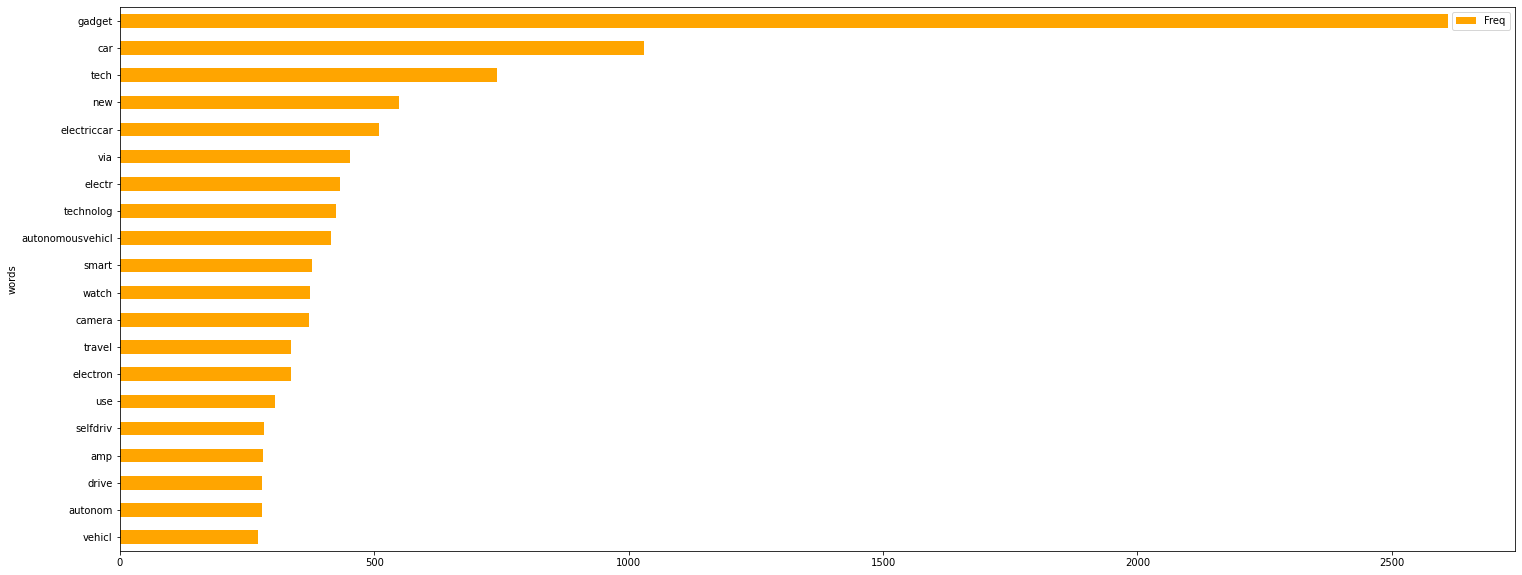

In [ ]:
fig,ax=plt.subplots(figsize=(25,10))
freq_word_df.sort_values(by='Freq').plot.barh(x='words',y='Freq',ax=ax,color='orange')
plt.show();

# Word Cloud

In [ ]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
word_string=' '.join(freq_word_df.words)
wordcloud=WordCloud(#stopwords=STOPWORDS,
                       background_color='black',
                     max_words=20
                      ).generate(word_string)

<Figure size 1080x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

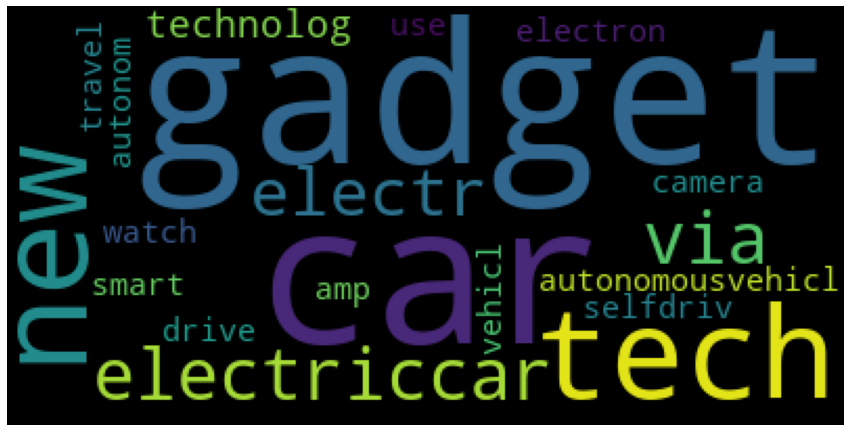

In [ ]:
plt.figure(figsize=(15,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Word2Vec

In [ ]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from gensim.models import Word2Vec

word2vec = Word2Vec(bagofwords, min_count=2)

In [ ]:
vocabulary = word2vec.wv.vocab
print(vocabulary)

{'bought': <gensim.models.keyedvectors.Vocab object at 0x7f059cba3e48>, 'projector': <gensim.models.keyedvectors.Vocab object at 0x7f059cba3c50>, 'connect': <gensim.models.keyedvectors.Vocab object at 0x7f059cba3630>, 'iphon': <gensim.models.keyedvectors.Vocab object at 0x7f05a57f3400>, 'promis': <gensim.models.keyedvectors.Vocab object at 0x7f05a57f3f98>, 'multi': <gensim.models.keyedvectors.Vocab object at 0x7f059f805668>, 'card': <gensim.models.keyedvectors.Vocab object at 0x7f059f8056d8>, 'reader': <gensim.models.keyedvectors.Vocab object at 0x7f059f8056a0>, 'leav': <gensim.models.keyedvectors.Vocab object at 0x7f05a53ff518>, 'review': <gensim.models.keyedvectors.Vocab object at 0x7f05a53ff080>, 'im': <gensim.models.keyedvectors.Vocab object at 0x7f05a53ffa90>, 'still': <gensim.models.keyedvectors.Vocab object at 0x7f05a53ff3c8>, 'wait': <gensim.models.keyedvectors.Vocab object at 0x7f05a53ffef0>, 'hello': <gensim.models.keyedvectors.Vocab object at 0x7f05a53ffb00>, 'apeman': <gens

In [ ]:
v1 = word2vec.wv['gadget']

In [ ]:
sim_words = word2vec.wv.most_similar('gadget')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
sim_words

[('techgadget', 0.9927362203598022),
 ('gadgetshop', 0.9908770322799683),
 ('item', 0.9838788509368896),
 ('coolth', 0.983622670173645),
 ('esitetech', 0.9829100370407104),
 ('tool', 0.9807729721069336),
 ('cook', 0.9800459146499634),
 ('jar', 0.9797459244728088),
 ('techi', 0.9796639680862427),
 ('knife', 0.9795888662338257)]

# Lexicon Model

In [ ]:
lex_file = open("AFINN-111.csv")

In [ ]:
word_list = []
print(word_list)
for  record in df:
    print("record")
    print(record)
    print("tokens")
    tokens = record.split()
    print(tokens)
    words = []
    for word in tokens:
        words.append(word.lower())
        print(words)
    
    word_list.append(words)
print("word_list")
print(word_list)

[]
record
Comments
tokens
['Comments']
['comments']
word_list
[['comments']]


In [ ]:
#Strip the records and create a word list for each tweet
word_list = []
for record in (corpus):# for record in (comments):
    #print(record)
    words = []
    tokens = record.split()
    #print(tokens)
    for token in tokens:
        words.append(token.lower())
    word_list.append(words)  
    
#word_list 

In [ ]:
lexicons = {}
records = lex_file.readlines()
for record in records:
    #print(record) # line contains newline charecter
    #print(record.rstrip('\n').split(",")) - to remove new line charecter
    lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])
print(lexicons)
#lexicons["abandon"]

{'\ufeffabandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2, 'absolves': 2, 'absolving': 2, 'absorbed': 1, 'abuse': -3, 'abused': -3, 'abuses': -3, 'abusive': -3, 'accept': 1, 'accepted': 1, 'accepting': 1, 'accepts': 1, 'accident': -2, 'accidental': -2, 'accidentally': -2, 'accidents': -2, 'accomplish': 2, 'accomplished': 2, 'accomplishes': 2, 'accusation': -2, 'accusations': -2, 'accuse': -2, 'accused': -2, 'accuses': -2, 'accusing': -2, 'ache': -2, 'achievable': 1, 'aching': -2, 'acquit': 2, 'acquits': 2, 'acquitted': 2, 'acquitting': 2, 'acrimonious': -3, 'active': 1, 'adequate': 1, 'admire': 3, 'admired': 3, 'admires': 3, 'admiring': 3, 'admit': -1, 'admits': -1, 'admitted': -1, 'admonish': -2, 'admonished': -2, 'adopt': 1, 'adopts': 1, 'adorable': 3, 'adore': 3, 'adored': 3

In [ ]:
strength = []
for Comments in word_list:
    score = 0
    for word in Comments:
        if word in (lexicons):
            score = score + lexicons[word]
    strength.append(score)

In [ ]:
senti_matrix = pd.DataFrame(strength, df.Comments)

In [ ]:
senti_matrix[0:10]

,0
Comments,
just bought thi projector clueless connect iphone??,-2
promis multi card reader leav review still wait susi,0
"hello apeman, your team respond email fix issu after multipl follow ups...",0
"great picture, excit about look camera,just need price come down littl look forward futur adventur with run camera #thejogshop #brighton #247running#runp #puresportsperformac #ukrunchat",3
have just bought apeman dashcam find rear camer cabl metr short. anyon idea where short extension?,0
possibl try?,0
price?,0
terribl compani product from china,0
"should say...hidden design, hid",-1


# Polarity by TextBlob

In [ ]:
sentiment_text = [TextBlob(Comments) for Comments in corpus]
print(sentiment_text[10].polarity)
print(sentiment_text[10])

-0.1499999999999999
bad news apeman put mine garbag done cheap product


In [ ]:
sentiments = [[Comments.sentiment.polarity, str(Comments)] for Comments in sentiment_text]
sentiment_df = pd.DataFrame(sentiments, columns=["Polarity","User Comments"])
sentiment_df.sort_values(by='Polarity',ascending=False)  

,Polarity,User Comments
5626,1.0,digitalchamb gadget hardwar review tc adobelig...
9059,1.0,best ball sincebal
414,1.0,tell truth princ ea one best messag yet watch ...
9273,1.0,best size buck
425,1.0,laughter best medicin amp headlin deliv infota...
...,...,...
2190,-0.8,googl interest hardwar announc rank googl
2898,-0.8,scienc confirm consum hate overcook pork chop ...
832,-1.0,evil lurk night alexhest evil almost readi ssa...
6747,-1.0,bleak futur singleoccup autonom car could incr...


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0595434668>],
      dtype=object)

Text(0.5, 1.0, 'Sentiments Distribution on Automotive Gadgets')

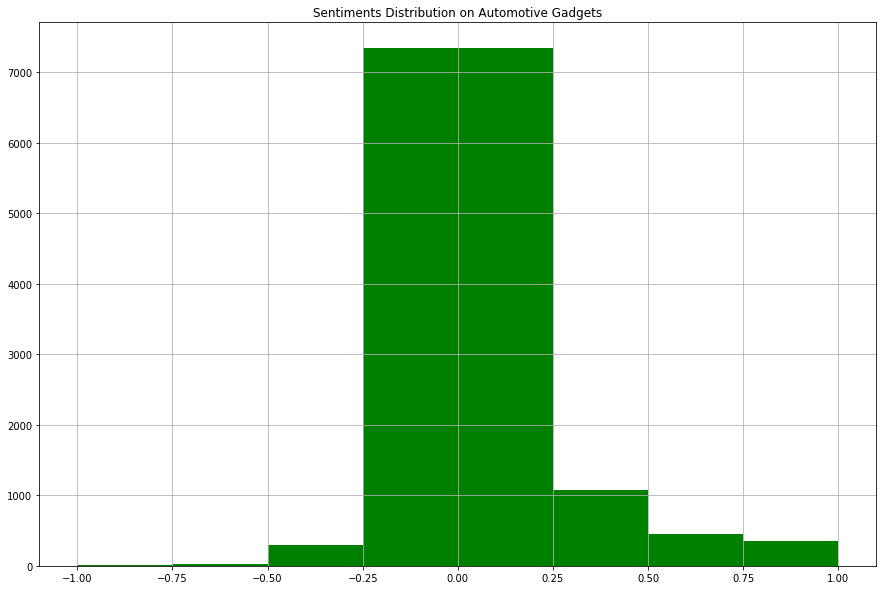

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

#Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1], ax=ax, color="green")
plt.title("Sentiments Distribution on Automotive Gadgets")
plt.show()

# Category from Polarity

In [ ]:
sentiment_df.groupby('Polarity').size()

Polarity
-1.00      3
-0.80     11
-0.70      8
-0.60      2
-0.60      6
        ... 
 0.75     17
 0.80    205
 0.85      1
 0.90      9
 1.00    124
Length: 449, dtype: int64

In [ ]:
bins=(-1.000000,-0.250000,0.250000,1.000000)
names=['Negative','Neutral','Positive']
sentiment_df['Polarity_type']=pd.cut(sentiment_df['Polarity'],bins,labels=names)

In [ ]:
sentiment_df.groupby('Polarity_type').size()

Polarity_type
Negative     355
Neutral     7482
Positive    1706
dtype: int64

In [ ]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Polarity       9546 non-null   float64 
 1   User Comments  9546 non-null   object  
 2   Polarity_type  9543 non-null   category
dtypes: category(1), float64(1), object(1)
memory usage: 158.7+ KB


In [ ]:
sentiment_df.columns

Index(['Polarity', 'User Comments', 'Polarity_type'], dtype='object')

In [ ]:
sentiment_df.columns = ['Polarity', 'UserComments', 'Polarity_type']

In [ ]:
dfp = pd.DataFrame(data=sentiment_df,
                    columns=['Polarity', 'UserComments', 'Polarity_type'])
dfp

,Polarity,UserComments,Polarity_type
0,0.0,bought projector clueless connect iphon,Neutral
1,0.0,promis multi card reader leav review im still ...,Neutral
2,0.0,hello apeman team respond email fix issu multi...,Neutral
3,0.8,great pictur excit look k camerajust need pric...,Positive
4,0.0,bought apeman dashcam find rear camer cabl met...,Neutral
...,...,...,...
9541,0.3,see fun begin xboxnintendoswitch playstat,Positive
9542,0.0,inch fhd p dvr camera recorderwhatsappwechat a...,Neutral
9543,0.0,inch fhd p dvr camera record whatsappwechat au...,Neutral
9544,0.0,autobrighttech autobrighttech caraccessori aut...,Neutral


***Identify & Treat NaN***

In [ ]:
pandas.isnull(dfp)

,Polarity,UserComments,Polarity_type
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
9541,False,False,False
9542,False,False,False
9543,False,False,False
9544,False,False,False


In [ ]:
# importing pandas package
import pandas as pd

# making data frame from excel file
#dataN = pd.read_excel("export_User_Comments_Polarity_Category.xlsx")

# creating bool series True for NaN values
#dataN_series = pd.isnull(dataN["Polarity_type"])
dataN_series = pd.isnull(dfp["Polarity_type"])

# filtering data
# displayind data only with team = NaN
#dataN[dataN_series]
dfp[dataN_series]

,Polarity,UserComments,Polarity_type
832,-1.0,evil lurk night alexhest evil almost readi ssa...,NaN
5747,-1.0,worst case autonom futur requir pedestrian bic...,NaN
6747,-1.0,bleak futur singleoccup autonom car could incr...,NaN


In [ ]:
# importing pandas module 
import pandas as pd 

# making data frame from csv file 
#dataN2 = pd.read_excel("export_User_Comments_Polarity_Category.xlsx")

# replacing na values in college with No college 
#dataN2["Polarity_type"].fillna("Negative", inplace = True) 
dfp["Polarity_type"].fillna("Negative", inplace = True)

dfp

,Polarity,UserComments,Polarity_type
0,0.0,bought projector clueless connect iphon,Neutral
1,0.0,promis multi card reader leav review im still ...,Neutral
2,0.0,hello apeman team respond email fix issu multi...,Neutral
3,0.8,great pictur excit look k camerajust need pric...,Positive
4,0.0,bought apeman dashcam find rear camer cabl met...,Neutral
...,...,...,...
9541,0.3,see fun begin xboxnintendoswitch playstat,Positive
9542,0.0,inch fhd p dvr camera recorderwhatsappwechat a...,Neutral
9543,0.0,inch fhd p dvr camera record whatsappwechat au...,Neutral
9544,0.0,autobrighttech autobrighttech caraccessori aut...,Neutral


In [ ]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Polarity       9546 non-null   float64 
 1   UserComments   9546 non-null   object  
 2   Polarity_type  9546 non-null   category
dtypes: category(1), float64(1), object(1)
memory usage: 158.7+ KB


In [ ]:
#Export to Excel
from pandas import ExcelWriter
writer = ExcelWriter('export_User_Comments_Polarity_Category.xlsx')
dfp.to_excel(writer,'Sheet1',index=False)
writer.save()

# EDA of Catarorized Data

In [ ]:
dfc = pd.read_excel('export_User_Comments_Polarity_Category.xlsx')

In [ ]:
dfc.columns
dfc.info()
dfc.shape

Index(['Polarity', 'UserComments', 'Polarity_type'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Polarity       9546 non-null   float64
 1   UserComments   9540 non-null   object 
 2   Polarity_type  9546 non-null   object 
dtypes: float64(1), object(2)
memory usage: 223.9+ KB


(9546, 3)

In [ ]:
dfc.head()

,Polarity,UserComments,Polarity_type
0,0.0,bought projector clueless connect iphon,Neutral
1,0.0,promis multi card reader leav review im still ...,Neutral
2,0.0,hello apeman team respond email fix issu multi...,Neutral
3,0.8,great pictur excit look k camerajust need pric...,Positive
4,0.0,bought apeman dashcam find rear camer cabl met...,Neutral


In [ ]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


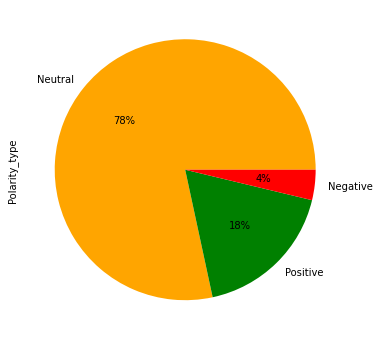

In [ ]:
dfc.Polarity_type.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["orange","green","red"])

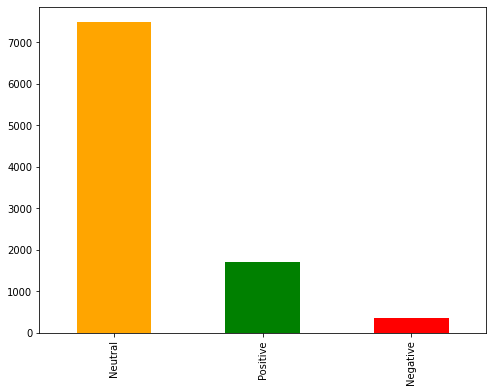

In [ ]:
dfc.Polarity_type.value_counts().plot(kind='bar',  color=["orange","green","red"])

# TF-IDF

***Vectorizing Dataset using TF-IDF***

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(corpus).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_features, dfc.Polarity_type, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7636, 2119)
(1910, 2119)
(7636,)
(1910,)


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

***Making Predictions and Evaluating the Model***

In [ ]:
predictions = text_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[  57   18    0]
 [  15 1435   45]
 [   0   34  306]]
              precision    recall  f1-score   support

    Negative       0.79      0.76      0.78        75
     Neutral       0.97      0.96      0.96      1495
    Positive       0.87      0.90      0.89       340

    accuracy                           0.94      1910
   macro avg       0.88      0.87      0.87      1910
weighted avg       0.94      0.94      0.94      1910

0.9413612565445026


In [ ]:
def clean_comment_length(UserComments):
    letters_only = re.sub("[^a-zA-Z]", " ",UserComments) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words) )

In [ ]:
def comment_to_words(UserComments):
    letters_only = re.sub("[^a-zA-Z]", " ",UserComments) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [ ]:
dfp['clean_comment']=dfp['UserComments'].apply(lambda x: comment_to_words(x))
dfp['comment_length']=dfp['UserComments'].apply(lambda x: clean_comment_length(x))
train,test = train_test_split(dfp,test_size=0.25,random_state=42)

In [ ]:
train_clean_comment=[]
for comment in train['clean_comment']:
    train_clean_comment.append(comment)
test_clean_comment=[]
for comment in test['clean_comment']:
    test_clean_comment.append(comment)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_comment)
test_features=v.transform(test_clean_comment)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [ ]:
#Classifiers
Classifiers = [
    SVC(kernel="rbf", C=0.03, gamma = 'scale'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    GradientBoostingClassifier(),GaussianNB()]

Accuracy of SVC is 0.7783829074151655
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         0
     Neutral       1.00      0.78      0.88      2387
    Positive       0.00      0.00      0.00         0

    accuracy                           0.78      2387
   macro avg       0.33      0.26      0.29      2387
weighted avg       1.00      0.78      0.88      2387



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 576x432 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:59: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f059386f908>)

([<matplotlib.axis.XTick at 0x7f05939dc9b0>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7f05939e2630>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

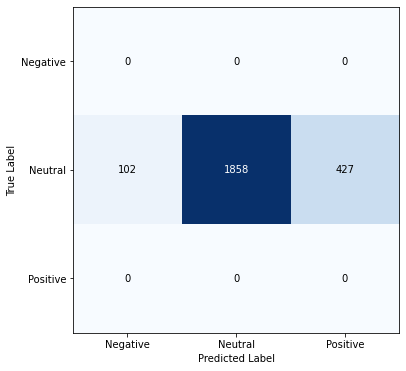

Accuracy of DecisionTreeClassifier is 0.9467951403435274
              precision    recall  f1-score   support

    Negative       0.89      0.83      0.86       109
     Neutral       0.95      0.98      0.97      1804
    Positive       0.94      0.85      0.89       474

    accuracy                           0.95      2387
   macro avg       0.93      0.89      0.91      2387
weighted avg       0.95      0.95      0.95      2387



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0593941e10>)

([<matplotlib.axis.XTick at 0x7f0593947e80>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7f0593958b00>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

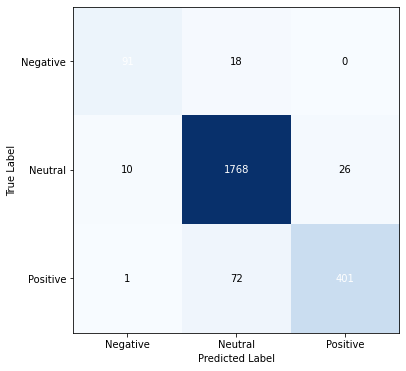

Accuracy of RandomForestClassifier is 0.9434436531210725
              precision    recall  f1-score   support

    Negative       0.70      0.85      0.76        84
     Neutral       0.96      0.97      0.96      1839
    Positive       0.94      0.86      0.90       464

    accuracy                           0.94      2387
   macro avg       0.86      0.89      0.87      2387
weighted avg       0.95      0.94      0.94      2387



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f05938cc7f0>)

([<matplotlib.axis.XTick at 0x7f05938f45f8>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7f05938c3278>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

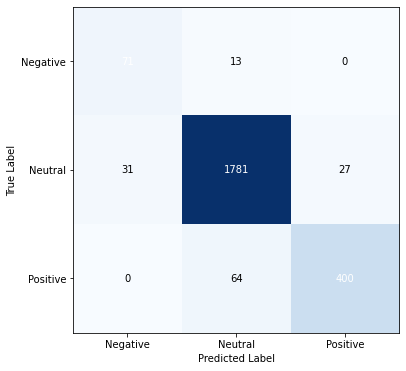

Accuracy of GradientBoostingClassifier is 0.9271051529116046
              precision    recall  f1-score   support

    Negative       0.70      0.79      0.74        90
     Neutral       0.97      0.94      0.95      1904
    Positive       0.81      0.89      0.85       393

    accuracy                           0.93      2387
   macro avg       0.83      0.87      0.85      2387
weighted avg       0.93      0.93      0.93      2387



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0593804978>)

([<matplotlib.axis.XTick at 0x7f0593812a20>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7f05938146a0>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

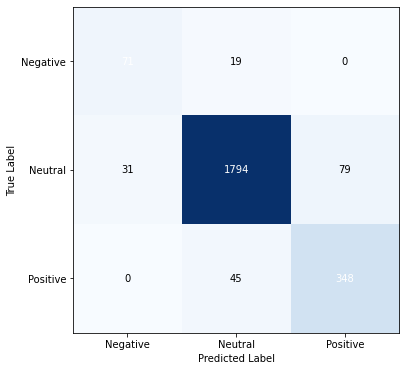

Accuracy of GaussianNB is 0.6870548806032677
              precision    recall  f1-score   support

    Negative       0.37      0.32      0.35       118
     Neutral       0.72      0.86      0.79      1565
    Positive       0.60      0.37      0.45       704

    accuracy                           0.69      2387
   macro avg       0.57      0.52      0.53      2387
weighted avg       0.67      0.69      0.67      2387



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f05937c5358>)

([<matplotlib.axis.XTick at 0x7f05937ee4e0>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7f05937eb7b8>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

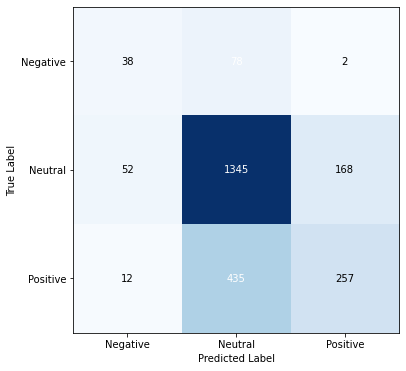

In [ ]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for clf in Classifiers:
    try:
        fit = clf.fit(train_features,train['Polarity_type'])
        pred = fit.predict(test_features)
    except Exception:
        fit = clf.fit(dense_features,train['Polarity_type'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['Polarity_type'])
    Accuracy.append(accuracy)
    Model.append(clf.__class__.__name__)
    print('Accuracy of '+clf.__class__.__name__+' is '+str(accuracy)) 
    print(classification_report(pred,test['Polarity_type']))
    
    #Confusion Matrix
    cm = confusion_matrix(pred,test['Polarity_type'])
    plt.figure()
    plot_confusion_matrix(cm,cmap=plt.cm.Blues)
    plt.xticks(range(3), ['Negative','Neutral','Positive'],color='black')
    plt.yticks(range(3), ['Negative','Neutral','Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Multinomial Naive Bayes model

In [ ]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [ ]:
%time nb.fit(X_train, y_train)

CPU times: user 116 ms, sys: 1.9 ms, total: 118 ms
Wall time: 86.8 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test)

In [ ]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.8596858638743455

In [ ]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[   4,   71,    0],
       [   0, 1484,   11],
       [   1,  185,  154]])

# Topic Modeling

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(dfc['UserComments'].values.astype('U'))

In [ ]:
#Now let's look at our document term matrix:
doc_term_matrix

<9546x5699 sparse matrix of type '<class 'numpy.int64'>'
	with 77377 stored elements in Compressed Sparse Row format>

***Latent Dirichlet Allocation (LDA)***

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
import random

for i in range(10):
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])

euring
campu
ownership
workforc
skill
amd
calendar
reshap
sportswear
scene


In [ ]:
# Let's find 10 words with the highest probability for the first topic. To get the first topic, 
# you can use the components_ attribute and pass a 0 index as the value:
first_topic = LDA.components_[0]
print(first_topic)

[0.20000442 1.67313438 4.13714512 ... 2.37366284 2.19997865 4.20428282]


In [ ]:
top_topic_words = first_topic.argsort()[-10:]
print(top_topic_words)

[2784 4979 3377 4954 1747 1536  791 1643 2077 1645]


In [ ]:
for i in top_topic_words:
    print(count_vect.get_feature_names()[i])

kitchen
technolog
new
tech
ev
dropship
car
electr
gadget
electriccar


In [ ]:
#Let's print the 10 words with highest probabilities for all the five topics:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['kitchen', 'technolog', 'new', 'tech', 'ev', 'dropship', 'car', 'electr', 'gadget', 'electriccar']


Top 10 words for topic #1:
['bluetooth', 'king', 'fm', 'usb', 'music', 'wireless', 'great', 'led', 'light', 'gadget']


Top 10 words for topic #2:
['techgadgetssmarttechcoolstuff', 'deal', 'smartphon', 'women', 'travel', 'electron', 'tech', 'watch', 'smart', 'gadget']


Top 10 words for topic #3:
['gift', 'dashboard', 'technolog', 'amp', 'googl', 'tech', 'new', 'shop', 'car', 'gadget']


Top 10 words for topic #4:
['work', 'hd', 'ai', 'autonom', 'robot', 'wifi', 'autonomousvehicl', 'gb', 'camera', 'car']




In [ ]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

(9546, 5)

In [ ]:
dfc['Topic'] = topic_values.argmax(axis=1)

In [ ]:
dfc.head(10)

,Polarity,UserComments,Polarity_type,Topic
0,0.0,bought projector clueless connect iphon,Neutral,4
1,0.0,promis multi card reader leav review im still ...,Neutral,1
2,0.0,hello apeman team respond email fix issu multi...,Neutral,4
3,0.8,great pictur excit look k camerajust need pric...,Positive,3
4,0.0,bought apeman dashcam find rear camer cabl met...,Neutral,4
5,0.0,possibl tri,Neutral,2
6,0.0,price,Neutral,4
7,0.0,terribl compani product china,Neutral,0
8,0.0,sayhidden design hid,Neutral,3
9,0.0,hello camera apeman app use wifi,Neutral,4


***Non-Negative Matrix Factorization (NMF)***

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = tfidf_vect.fit_transform(dfc['UserComments'].values.astype('U'))

In [ ]:
# Once the document term matrix is generated, we can create a probability matrix that contains probabilities of all the words
# in the vocabulary for all the topics. To do so, we can use the NMF class from the sklearn.decomposition module. 
# Look at the following script:

from sklearn.decomposition import NMF

nmf = NMF(n_components=5, random_state=42)
nmf.fit(doc_term_matrix )

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [ ]:
#As we did in the previous section, let's randomly get 10 words from our vocabulary:
import random

for i in range(10):
    random_id = random.randint(0,len(tfidf_vect.get_feature_names()))
    print(tfidf_vect.get_feature_names()[random_id])

autopilot
xl
ssa
multipurpos
perfum
hat
matt
lq
pay
ny


In [ ]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=5, random_state=42)
nmf.fit(doc_term_matrix )

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [ ]:
import random

for i in range(10):
    random_id = random.randint(0,len(tfidf_vect.get_feature_names()))
    print(tfidf_vect.get_feature_names()[random_id])

iam
iphonepro
straw
kill
tomorrow
len
brazilian
kg
kelli
karla


In [ ]:
first_topics = nmf.components_[0]
top_topic_words = first_topics.argsort()[-10:]

In [ ]:
for i in top_topic_words:
    print(tfidf_vect.get_feature_names()[i])

gift
deal
wireless
smart
travel
watch
electron
technolog
tech
gadget


In [ ]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['gift', 'deal', 'wireless', 'smart', 'travel', 'watch', 'electron', 'technolog', 'tech', 'gadget']


Top 10 words for topic #1:
['light', 'gadget', 'outdoor', 'kitchen', 'wholesal', 'accept', 'shopifi', 'aliepxress', 'shoponlin', 'dropship']


Top 10 words for topic #2:
['project', 'new', 'electricvehicl', 'autonomousvehicl', 'selfdriv', 'ev', 'dyson', 'electr', 'car', 'electriccar']


Top 10 words for topic #3:
['edit', 'hifi', 'love', 'sound', 'audio', 'gadget', 'music', 'mcintosh', 'fm', 'king']


Top 10 words for topic #4:
['gadget', 'purshas', 'amaz', 'choic', 'ff', 'style', 'dealstreetonlin', 'fashion', 'kid', 'shop']




In [ ]:
topic_values = nmf.transform(doc_term_matrix)
dfc['Topics'] = topic_values.argmax(axis=1)
dfc.head(5)

,Polarity,UserComments,Polarity_type,Topic,Topics
0,0.0,bought projector clueless connect iphon,Neutral,4,0
1,0.0,promis multi card reader leav review im still ...,Neutral,1,0
2,0.0,hello apeman team respond email fix issu multi...,Neutral,4,2
3,0.8,great pictur excit look k camerajust need pric...,Positive,3,2
4,0.0,bought apeman dashcam find rear camer cabl met...,Neutral,4,2


# Prediction Models

In [ ]:
dfp = pd.read_excel('export_User_Comments_Polarity_Category.xlsx')

In [ ]:
dfp.head()

,Polarity,UserComments,Polarity_type
0,0.0,bought projector clueless connect iphon,Neutral
1,0.0,promis multi card reader leav review im still ...,Neutral
2,0.0,hello apeman team respond email fix issu multi...,Neutral
3,0.8,great pictur excit look k camerajust need pric...,Positive
4,0.0,bought apeman dashcam find rear camer cabl met...,Neutral


In [ ]:
#Check for NaN values in each column
dfp.isna().sum()
#Percentage of NaN values
((len(dfp)-dfp.count())/len(dfp))*100

Polarity         0
UserComments     6
Polarity_type    0
dtype: int64

Polarity         0.000000
UserComments     0.062854
Polarity_type    0.000000
dtype: float64

In [ ]:
#dfp.UserComments = dfp.UserComments.astype(str)
#dfp['UserComments'] = dfp['UserComments'].astype('|S')
dfp['UserComments'] = dfp['UserComments'].astype(str)

In [ ]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Polarity       9546 non-null   float64
 1   UserComments   9546 non-null   object 
 2   Polarity_type  9546 non-null   object 
dtypes: float64(1), object(2)
memory usage: 223.9+ KB


# Comparison of Model Accuracies

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


<BarContainer object of 5 artists>

([<matplotlib.axis.XTick at 0x7f0593048828>,
 [Text(0, 0, 'SVC'),
  Text(0, 0, 'DecisionTreeClassifier'),
  Text(0, 0, 'RandomForestClassifier'),
  Text(0, 0, 'GradientBoostingClassifier'),
  Text(0, 0, 'GaussianNB')])

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Model')

Text(0.5, 1.0, 'Classifier Accuracies')

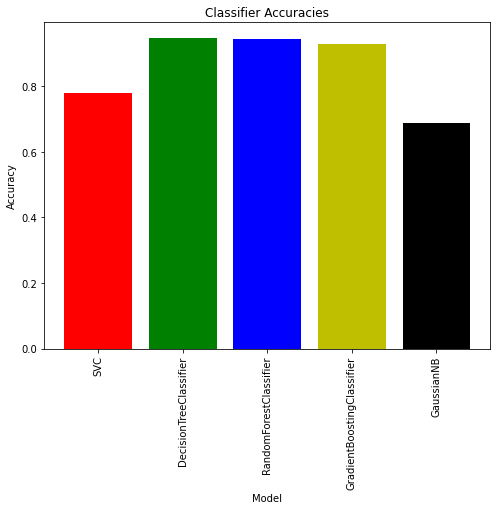

In [ ]:
index=list(range(len(Classifiers)))
plt.bar(index,Accuracy,color='rgbyk')
plt.xticks(index,Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Classifier Accuracies')